# Wine Quality Classification

## About dataset

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. The reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

## Imports

In [455]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
from tensorflow import keras
import matplotlib.pyplot as plt

## Loading data and shuffling the dataset

In [456]:
df = pd.read_csv("winequalityN.csv")
df = shuffle(df)
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [457]:
df.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5463,red,12.7,0.60,0.49,2.8,0.075,5.0,19.0,0.9994,3.14,0.57,11.4,5
686,white,6.8,0.22,0.35,5.5,0.043,21.0,114.0,0.9938,3.30,0.53,10.7,7
475,white,7.0,0.24,0.51,11.0,0.029,55.0,227.0,0.9965,3.03,0.61,9.5,5


## Dataset info

As we can see we have unfortunately inconsistent data in some rows there are data gaps

In [458]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 5463 to 3392
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [459]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

## The first database preprocess

At the beginning, we delete the rows in which we have missing data

In [460]:
classic_df = df.dropna(axis=0)
classic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 5463 to 3392
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


In [461]:
classic_df['quality'].value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

Then we divide our data into X and y where X is input and y is output (quality)

In [462]:
X = classic_df.drop(columns="quality")
y = classic_df['quality']

X.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
5463,red,12.7,0.60,0.49,2.8,0.075,5.0,19.0,0.9994,3.14,0.57,11.4
686,white,6.8,0.22,0.35,5.5,0.043,21.0,114.0,0.9938,3.30,0.53,10.7
475,white,7.0,0.24,0.51,11.0,0.029,55.0,227.0,0.9965,3.03,0.61,9.5


In [463]:
y.head(15)

5463    5
686     7
475     5
2518    7
6249    6
1433    6
3489    8
470     6
3563    5
4320    5
6363    5
3941    5
2691    6
1302    6
3456    5
Name: quality, dtype: int64

We replace the quality rating with versions with only two solutions - good and average

In [464]:
bins = [0, 5.5, 10]
labels = ["average", "good"]
y = pd.cut(y, bins=bins, labels=labels)
y.head(15)

5463    average
686        good
475     average
2518       good
6249       good
1433       good
3489       good
470        good
3563    average
4320    average
6363    average
3941    average
2691       good
1302       good
3456    average
Name: quality, dtype: category
Categories (2, object): ['average' < 'good']

We replace average and good with 0 and 1 and wine types (red and white) also with 0 and 1 as well

In [465]:
le = LabelEncoder()
y = le.fit_transform(y)
y[:15]

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0])

In [466]:
X['type'] = le.fit_transform(X['type'])
X[:5]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
5463,0,12.7,0.60,0.49,2.8,0.075,5.0,19.0,0.99940,3.14,0.57,11.4
686,1,6.8,0.22,0.35,5.5,0.043,21.0,114.0,0.99380,3.30,0.53,10.7
475,1,7.0,0.24,0.51,11.0,0.029,55.0,227.0,0.99650,3.03,0.61,9.5
2518,1,7.1,0.12,0.30,3.1,0.018,15.0,37.0,0.99004,3.02,0.52,11.9
6249,0,7.2,0.62,0.01,2.3,0.065,8.0,46.0,0.99332,3.32,0.51,11.8


## Data standardization

In [467]:
sc = StandardScaler()
X = sc.fit_transform(X)
X.shape

(6463, 12)

## Data split into test and training set 30 - 70%

In [468]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=60)

## Decision trees

We use two decision trees - one without constraints and the other with a maximum depth of three levels

In [469]:
clf = tree.DecisionTreeClassifier()
clf_smaller = tree.DecisionTreeClassifier(max_depth=3)

In [470]:
clf = clf.fit(x_train, y_train)
clf_smaller = clf_smaller.fit(x_train, y_train)

[Text(0.5663574772985244, 0.9772727272727273, 'x[11] <= -0.315\ngini = 0.467\nsamples = 4524\nvalue = [1677, 2847]'),
 Text(0.2980329821698827, 0.9318181818181818, 'x[2] <= -0.347\ngini = 0.492\nsamples = 2079\nvalue = [1170, 909]'),
 Text(0.11233978906545593, 0.8863636363636364, 'x[2] <= -0.696\ngini = 0.475\nsamples = 925\nvalue = [360, 565]'),
 Text(0.04846528566023458, 0.8409090909090909, 'x[6] <= -0.958\ngini = 0.397\nsamples = 421\nvalue = [115, 306]'),
 Text(0.0270525917517972, 0.7954545454545454, 'x[5] <= -0.187\ngini = 0.444\nsamples = 21\nvalue = [14, 7]'),
 Text(0.024025728339008703, 0.75, 'x[9] <= 1.753\ngini = 0.142\nsamples = 13\nvalue = [12, 1]'),
 Text(0.022512296632614455, 0.7045454545454546, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.02553916004540295, 0.7045454545454546, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.030079455164585697, 0.75, 'x[3] <= 1.145\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(0.02856602345819145, 0.7045454545454546, 'g

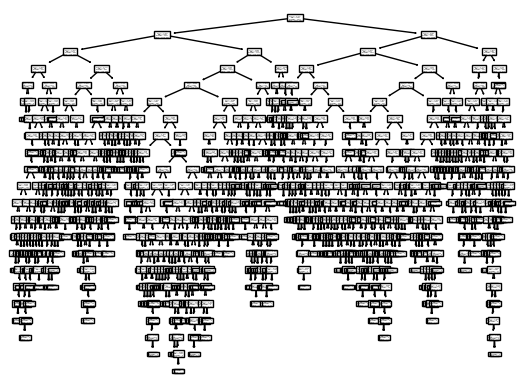

In [471]:
tree.plot_tree(clf)

[Text(0.5, 0.875, 'x[11] <= -0.315\ngini = 0.467\nsamples = 4524\nvalue = [1677, 2847]'),
 Text(0.25, 0.625, 'x[2] <= -0.347\ngini = 0.492\nsamples = 2079\nvalue = [1170, 909]'),
 Text(0.125, 0.375, 'x[2] <= -0.696\ngini = 0.475\nsamples = 925\nvalue = [360, 565]'),
 Text(0.0625, 0.125, 'gini = 0.397\nsamples = 421\nvalue = [115, 306]'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 504\nvalue = [245, 259]'),
 Text(0.375, 0.375, 'x[1] <= 2.182\ngini = 0.418\nsamples = 1154\nvalue = [810, 344]'),
 Text(0.3125, 0.125, 'gini = 0.407\nsamples = 1098\nvalue = [786, 312]'),
 Text(0.4375, 0.125, 'gini = 0.49\nsamples = 56\nvalue = [24, 32]'),
 Text(0.75, 0.625, 'x[11] <= 0.781\ngini = 0.329\nsamples = 2445\nvalue = [507, 1938]'),
 Text(0.625, 0.375, 'x[2] <= -0.468\ngini = 0.412\nsamples = 1459\nvalue = [423, 1036]'),
 Text(0.5625, 0.125, 'gini = 0.289\nsamples = 702\nvalue = [123, 579]'),
 Text(0.6875, 0.125, 'gini = 0.478\nsamples = 757\nvalue = [300, 457]'),
 Text(0.875, 0.375, 'x[6] <= -0.5

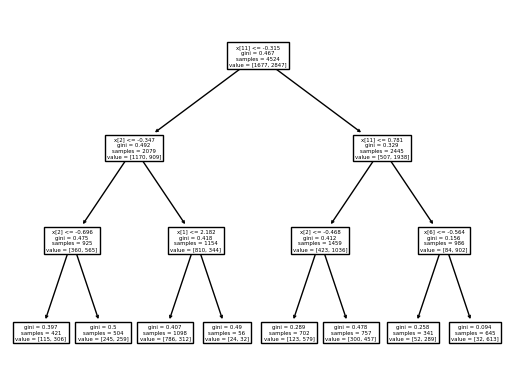

In [472]:
tree.plot_tree(clf_smaller)

In [473]:
prediction = clf.predict(x_test)
prediction_smaller = clf_smaller.predict(x_test)

print("Accuracy on test data set with bigger tree: ", accuracy_score(prediction, y_test))
print("Accuracy on test data set with smaller tree: ", accuracy_score(prediction_smaller, y_test))

Accuracy on test data set with bigger tree:  0.7581227436823105
Accuracy on test data set with smaller tree:  0.7354306343476018


As we can see, a deeper decision tree performs better, but it takes more time

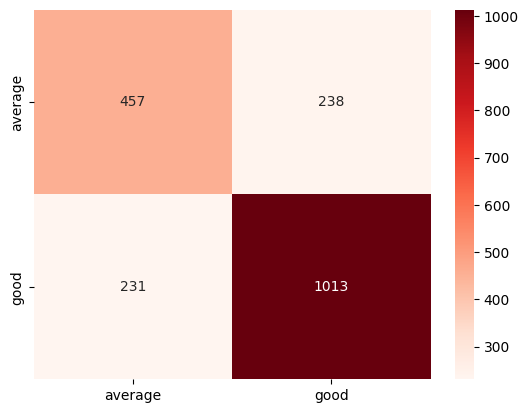

In [474]:
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

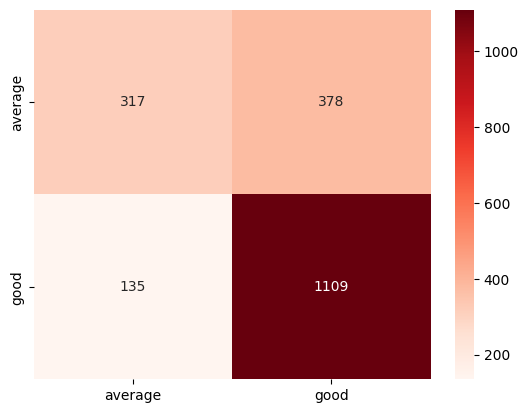

In [475]:
ax = sns.heatmap(confusion_matrix(y_test, prediction_smaller), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

## Naive-Bayes

In [476]:
model = GaussianNB()
model.fit(x_train, y_train)
print("Accuracy on test data set: ", model.score(x_test, y_test))

Accuracy on test data set:  0.6833419288292935


As we can see, it has worse accuracy than the decision trees

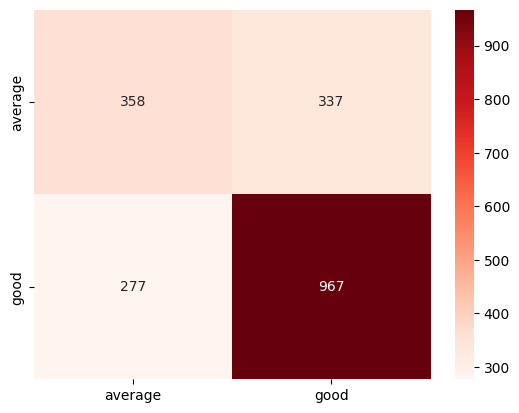

In [477]:
prediction = model.predict(x_test)
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

## K-nearest neighbors

First try with three neighbors

In [478]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(x_train, y_train)

print("Accuracy on test data set: ", knn.score(x_test, y_test))

Accuracy on test data set:  0.7648272305312016


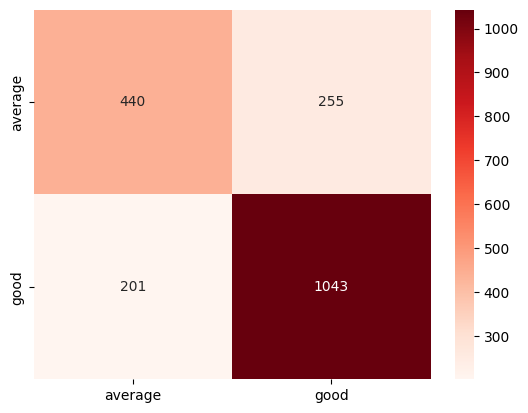

In [479]:
prediction = knn.predict(x_test)
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

Six neighbors

In [480]:
knn = KNeighborsClassifier(n_neighbors=6, metric='euclidean')
knn.fit(x_train, y_train)

print("Accuracy on test data set: ", knn.score(x_test, y_test))

Accuracy on test data set:  0.7534811758638473


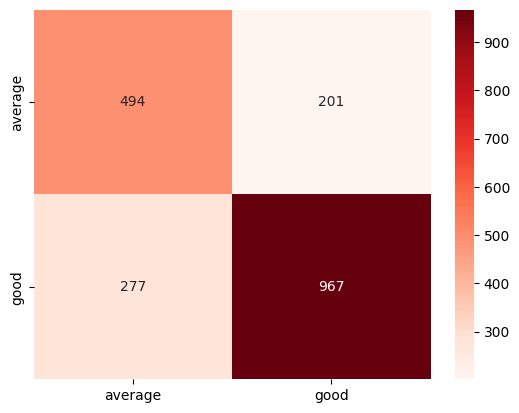

In [481]:
prediction = knn.predict(x_test)
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

Nine neighbors

In [482]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(x_train, y_train)

print("Accuracy on test data set: ", knn.score(x_test, y_test))

Accuracy on test data set:  0.7581227436823105


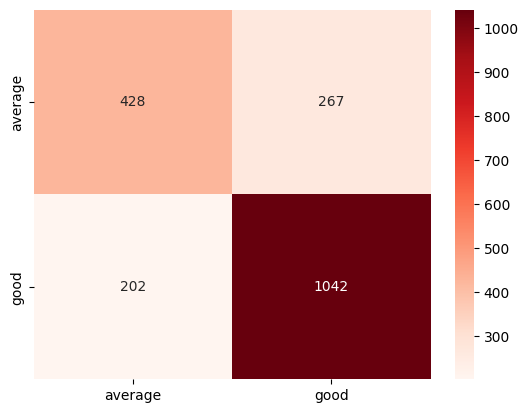

In [483]:
prediction = knn.predict(x_test)
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

Twelve neighbors

In [484]:
knn = KNeighborsClassifier(n_neighbors=12, metric='euclidean')
knn.fit(x_train, y_train)

print("Accuracy on test data set: ", knn.score(x_test, y_test))

Accuracy on test data set:  0.7524497163486333


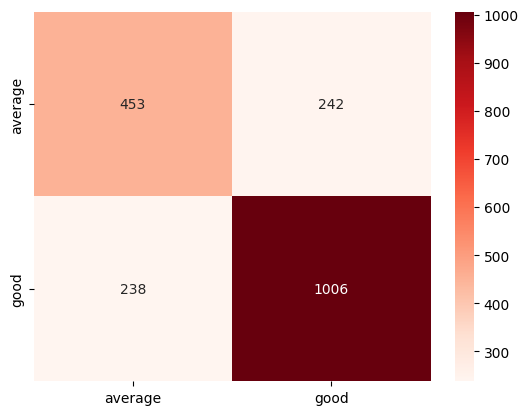

In [485]:
prediction = knn.predict(x_test)
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

As we can see, there is no big difference in the results

## Neural networks

First try with MLPClassifier from sklearn with structure 6, 3, relu activation function, solver adam

In [486]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(6, 3), random_state=1, activation='relu')
clf = clf.fit(x_train, y_train)
prediction = clf.predict(x_test)

print("Accuracy on test data set: ", accuracy_score(prediction, y_test))

Accuracy on test data set:  0.7607013924703455


c:\Users\Piotr Damrych\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


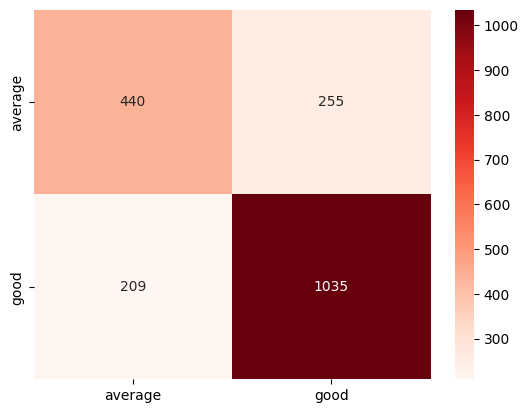

In [487]:
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

## Preparation of the dataset for neural networks with keras

In [488]:
y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_test_to_validation = keras.utils.to_categorical(y_test, num_classes=2)
y_train[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

First try with 3, 6, 2 structure, relu and sigmoid activation functions, solver adam

In [489]:
model = Sequential()
model.add(Dense(9, activation='relu', input_dim=(x_train.shape[1])))
model.add(Dense(18, activation='relu'))
model.add(Dense(2, activation='softmax'))
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, verbose=0, validation_data=(x_test, y_test_to_validation))

In [490]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=-1)

print("Accuracy: ", accuracy_score(y_test, pred))

61/61 [==============================] - 0s 2ms/step
Accuracy:  0.7715317173800929


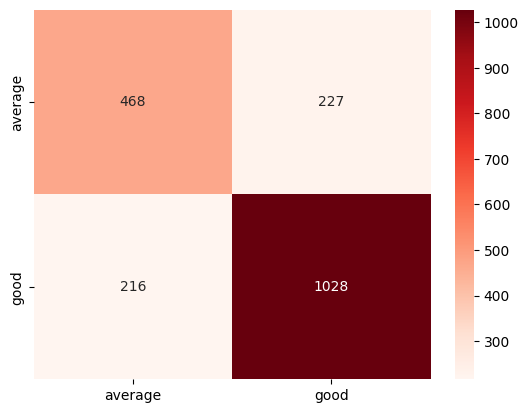

In [491]:
ax = sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

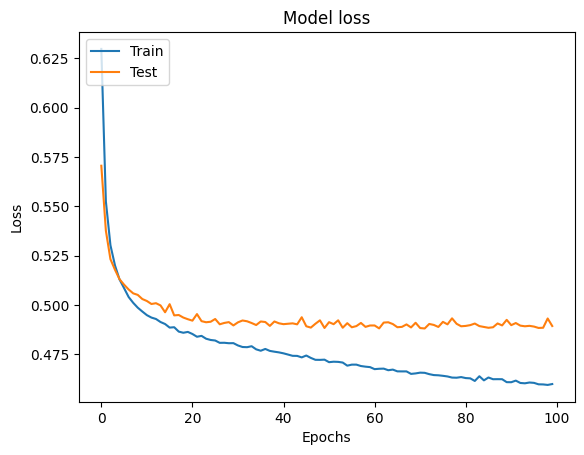

In [492]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Second try with 3, 6, 2 structure, elu and softmax activation functions, solver adam

In [493]:
model = Sequential()
model.add(Dense(3, activation='elu', input_dim=(x_train.shape[1])))
model.add(Dense(6, activation='elu'))
model.add(Dense(2, activation='softmax'))
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, verbose=0, validation_data=(x_test, y_test_to_validation))

In [494]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=-1)

print("Accuracy: ", accuracy_score(y_test, pred))

61/61 [==============================] - 0s 1ms/step
Accuracy:  0.7576070139247034


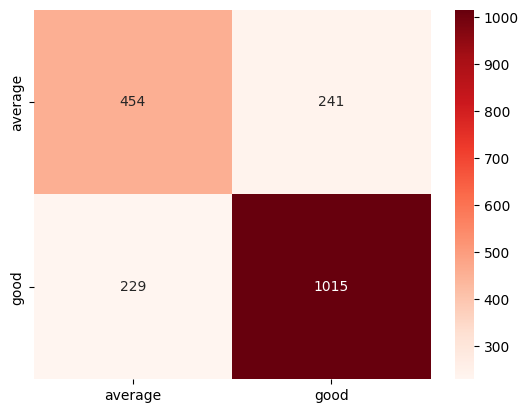

In [495]:
ax = sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

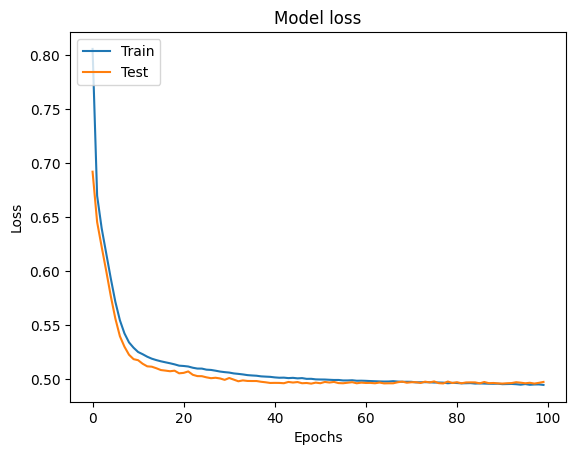

In [496]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Third try with 3, 4, 2 structure, tanh and softmax activation functions, solver adam

In [497]:
model = Sequential()
model.add(Dense(3, activation='tanh', input_dim=(x_train.shape[1])))
model.add(Dense(4, activation='tanh'))
model.add(Dense(2, activation='softmax'))
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, verbose=0, validation_data=(x_test, y_test_to_validation))

In [498]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=-1)

print("Accuracy: ", accuracy_score(y_test, pred))

61/61 [==============================] - 0s 2ms/step
Accuracy:  0.7627643115007736


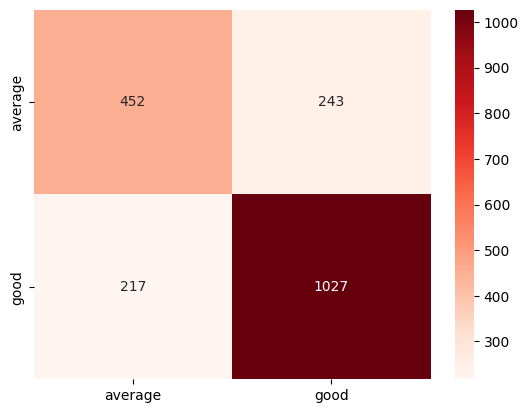

In [499]:
ax = sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

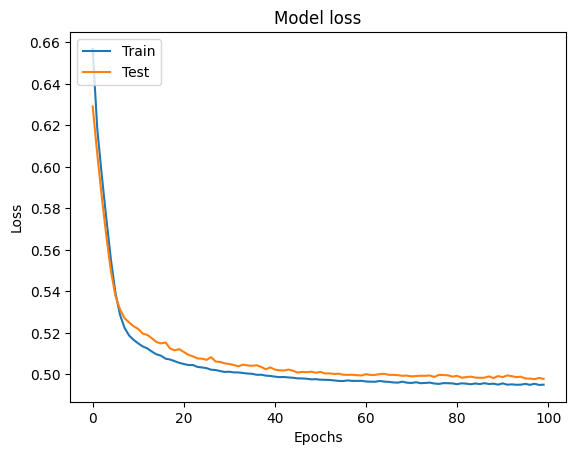

In [500]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Another dataset processing

This time, instead of deleting rows with empty values, we extract the mean for them

In [501]:
different_df = df
different_df['fixed acidity'] = different_df['fixed acidity'].fillna(different_df['fixed acidity'].mean())
different_df['volatile acidity'] = different_df['volatile acidity'].fillna(different_df['volatile acidity'].mean())
different_df['citric acid'] = different_df['citric acid'].fillna(different_df['citric acid'].mean())
different_df['residual sugar'] = different_df['residual sugar'].fillna(different_df['residual sugar'].mean())
different_df['chlorides'] = different_df['chlorides'].fillna(different_df['chlorides'].mean())
different_df['pH'] = different_df['pH'].fillna(different_df['pH'].mean())
different_df['sulphates'] = different_df['sulphates'].fillna(different_df['sulphates'].mean())

different_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 5463 to 3392
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [502]:
different_df['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

Preparing the dataset is the same as in the previous example with one exception

The only difference is normalization, where we use MinMaxScaler instead of StandardScaler, which converts all values to values between 0 and 1

In [503]:
X = different_df.drop(columns="quality")
y = different_df['quality']

X.head(3)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
5463,red,12.7,0.60,0.49,2.8,0.075,5.0,19.0,0.9994,3.14,0.57,11.4
686,white,6.8,0.22,0.35,5.5,0.043,21.0,114.0,0.9938,3.30,0.53,10.7
475,white,7.0,0.24,0.51,11.0,0.029,55.0,227.0,0.9965,3.03,0.61,9.5


In [504]:
bins = [0, 5.5, 10]
labels = ["average", "good"]
y = pd.cut(y, bins=bins, labels=labels)
y.head(15)

5463    average
686        good
475     average
2518       good
6249       good
1433       good
3489       good
470        good
3563    average
4320    average
6363    average
3941    average
2691       good
1302       good
3456    average
Name: quality, dtype: category
Categories (2, object): ['average' < 'good']

In [505]:
le = LabelEncoder()
y = le.fit_transform(y)
y[:15]

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0])

In [506]:
X['type'] = le.fit_transform(X['type'])
X[:5]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
5463,0,12.7,0.60,0.49,2.8,0.075,5.0,19.0,0.99940,3.14,0.57,11.4
686,1,6.8,0.22,0.35,5.5,0.043,21.0,114.0,0.99380,3.30,0.53,10.7
475,1,7.0,0.24,0.51,11.0,0.029,55.0,227.0,0.99650,3.03,0.61,9.5
2518,1,7.1,0.12,0.30,3.1,0.018,15.0,37.0,0.99004,3.02,0.52,11.9
6249,0,7.2,0.62,0.01,2.3,0.065,8.0,46.0,0.99332,3.32,0.51,11.8


In [507]:
sc = MinMaxScaler()
X = sc.fit_transform(X)
X.shape

(6497, 12)

## Data split into test and training set 30 - 70%

In [508]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=60)

## Decision trees

We use two decision trees - one without constraints and the other with a maximum depth of three levels

In [509]:
clf = tree.DecisionTreeClassifier()
clf_smaller = tree.DecisionTreeClassifier(max_depth=3)

In [510]:
clf = clf.fit(x_train, y_train)
clf_smaller = clf_smaller.fit(x_train, y_train)

[Text(0.5712640739889706, 0.9782608695652174, 'x[11] <= 0.341\ngini = 0.463\nsamples = 4547\nvalue = [1652, 2895]'),
 Text(0.27087239583333333, 0.9347826086956522, 'x[2] <= 0.13\ngini = 0.496\nsamples = 2293\nvalue = [1246, 1047]'),
 Text(0.11241344975490196, 0.8913043478260869, 'x[2] <= 0.083\ngini = 0.462\nsamples = 963\nvalue = [349, 614]'),
 Text(0.04610294117647059, 0.8478260869565217, 'x[4] <= 0.101\ngini = 0.355\nsamples = 368\nvalue = [85, 283]'),
 Text(0.01926470588235294, 0.8043478260869565, 'x[9] <= 0.298\ngini = 0.441\nsamples = 204\nvalue = [67, 137]'),
 Text(0.00784313725490196, 0.7608695652173914, 'x[4] <= 0.025\ngini = 0.488\nsamples = 45\nvalue = [26, 19]'),
 Text(0.003137254901960784, 0.717391304347826, 'x[11] <= 0.254\ngini = 0.375\nsamples = 28\nvalue = [21, 7]'),
 Text(0.001568627450980392, 0.6739130434782609, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.004705882352941176, 0.6739130434782609, 'x[6] <= 0.043\ngini = 0.475\nsamples = 18\nvalue = [11, 7]'),


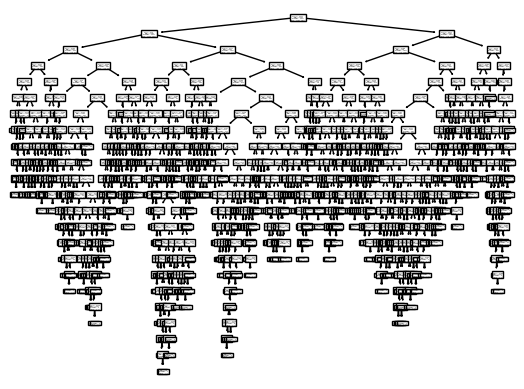

In [511]:
tree.plot_tree(clf)

[Text(0.5, 0.875, 'x[11] <= 0.341\ngini = 0.463\nsamples = 4547\nvalue = [1652, 2895]'),
 Text(0.25, 0.625, 'x[2] <= 0.13\ngini = 0.496\nsamples = 2293\nvalue = [1246, 1047]'),
 Text(0.125, 0.375, 'x[2] <= 0.083\ngini = 0.462\nsamples = 963\nvalue = [349, 614]'),
 Text(0.0625, 0.125, 'gini = 0.355\nsamples = 368\nvalue = [85, 283]'),
 Text(0.1875, 0.125, 'gini = 0.494\nsamples = 595\nvalue = [264, 331]'),
 Text(0.375, 0.375, 'x[10] <= 0.177\ngini = 0.439\nsamples = 1330\nvalue = [897, 433]'),
 Text(0.3125, 0.125, 'gini = 0.36\nsamples = 666\nvalue = [509, 157]'),
 Text(0.4375, 0.125, 'gini = 0.486\nsamples = 664\nvalue = [388, 276]'),
 Text(0.75, 0.625, 'x[11] <= 0.511\ngini = 0.295\nsamples = 2254\nvalue = [406, 1848]'),
 Text(0.625, 0.375, 'x[6] <= 0.068\ngini = 0.38\nsamples = 1369\nvalue = [349, 1020]'),
 Text(0.5625, 0.125, 'gini = 0.475\nsamples = 488\nvalue = [189, 299]'),
 Text(0.6875, 0.125, 'gini = 0.297\nsamples = 881\nvalue = [160, 721]'),
 Text(0.875, 0.375, 'x[7] <= 0.172

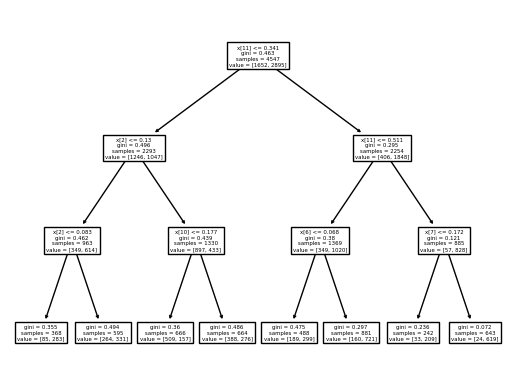

In [512]:
tree.plot_tree(clf_smaller)

In [513]:
prediction = clf.predict(x_test)
prediction_smaller = clf_smaller.predict(x_test)

print("Accuracy on test data set with bigger tree: ", accuracy_score(prediction, y_test))
print("Accuracy on test data set with smaller tree: ", accuracy_score(prediction_smaller, y_test))

Accuracy on test data set with bigger tree:  0.7589743589743589
Accuracy on test data set with smaller tree:  0.7323076923076923


As we can see, a deeper decision tree performs better, but it takes more time

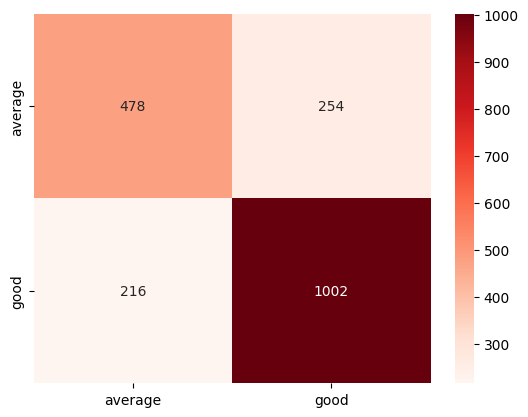

In [514]:
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

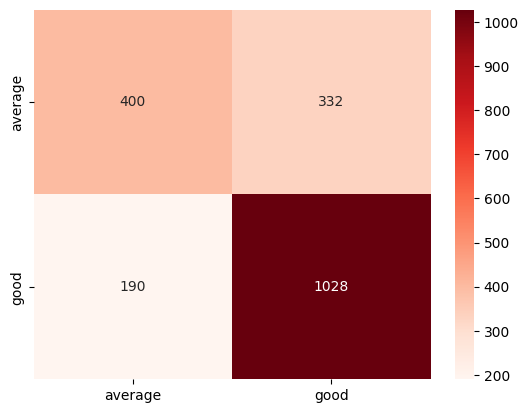

In [515]:
ax = sns.heatmap(confusion_matrix(y_test, prediction_smaller), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

## Naive-Bayes

In [516]:
model = GaussianNB()
model.fit(x_train, y_train)
print("Accuracy on test data set: ", model.score(x_test, y_test))

Accuracy on test data set:  0.6707692307692308


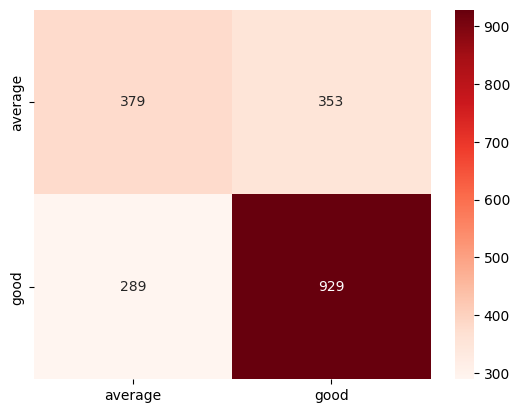

In [517]:
prediction = model.predict(x_test)
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

## K-nearest neighbors

First try with three neighbors

In [518]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(x_train, y_train)

print("Accuracy on test data set: ", knn.score(x_test, y_test))

Accuracy on test data set:  0.7497435897435898


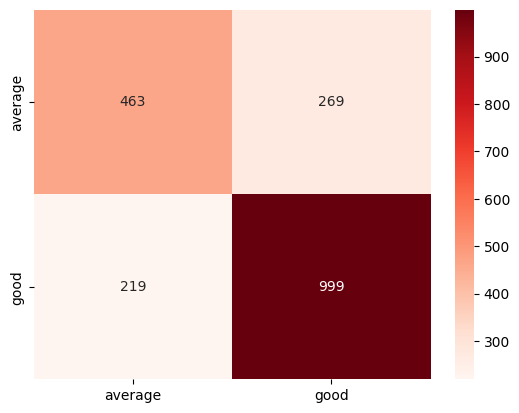

In [519]:
prediction = knn.predict(x_test)
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

Six neighbors

In [520]:
knn = KNeighborsClassifier(n_neighbors=6, metric='euclidean')
knn.fit(x_train, y_train)

print("Accuracy on test data set: ", knn.score(x_test, y_test))

Accuracy on test data set:  0.7564102564102564


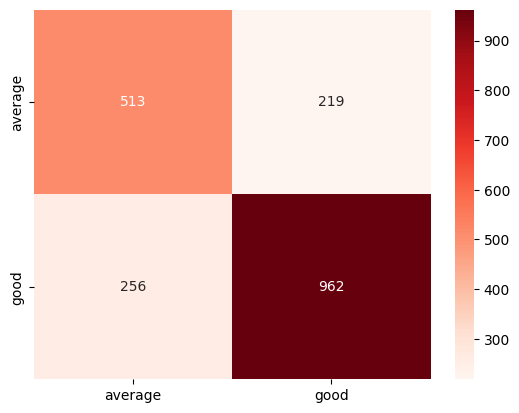

In [521]:
prediction = knn.predict(x_test)
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

Nine neighbors

In [522]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(x_train, y_train)

print("Accuracy on test data set: ", knn.score(x_test, y_test))

Accuracy on test data set:  0.7625641025641026


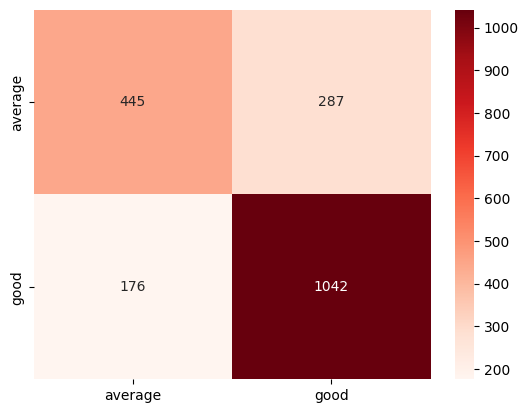

In [523]:
prediction = knn.predict(x_test)
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

Twelve neighbors

In [524]:
knn = KNeighborsClassifier(n_neighbors=12, metric='euclidean')
knn.fit(x_train, y_train)

print("Accuracy on test data set: ", knn.score(x_test, y_test))

Accuracy on test data set:  0.76


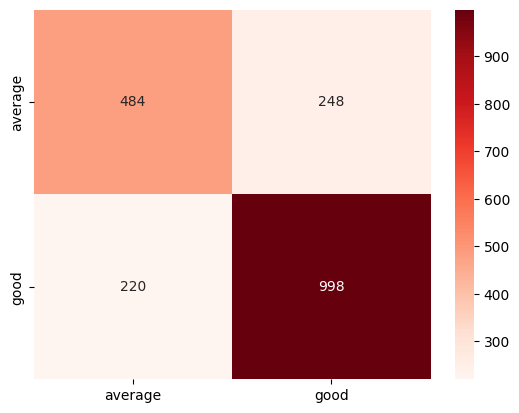

In [525]:
prediction = knn.predict(x_test)
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

As we can see, there is no big difference in the results

## Neural networks

First try with MLPClassifier from sklearn with structure 6, 3, relu activation function, solver adam

In [526]:
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(6, 3), random_state=1, activation='relu')
clf = clf.fit(x_train, y_train)
prediction = clf.predict(x_test)

print("Accuracy on test data set: ", accuracy_score(prediction, y_test))

Accuracy on test data set:  0.7497435897435898


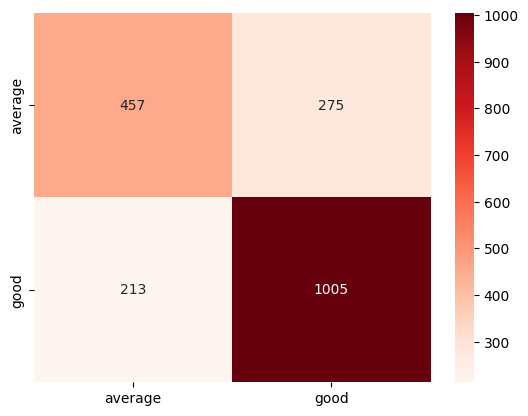

In [527]:
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

## Preparation of the dataset for neural networks with keras

In [528]:
y_train = keras.utils.to_categorical(y_train, num_classes=2)
y_test_to_validation = keras.utils.to_categorical(y_test, num_classes=2)
y_train[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

First try with 3, 4, 2 structure, tanh and softmax activation functions, solver adam

In [529]:
model = Sequential()
model.add(Dense(3, activation='tanh', input_dim=(x_train.shape[1])))
model.add(Dense(4, activation='tanh'))
model.add(Dense(2, activation='sigmoid'))
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, verbose=0, validation_data=(x_test, y_test_to_validation))

In [530]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=-1)

print("Accuracy: ", accuracy_score(y_test, pred))

61/61 [==============================] - 0s 2ms/step
Accuracy:  0.7487179487179487


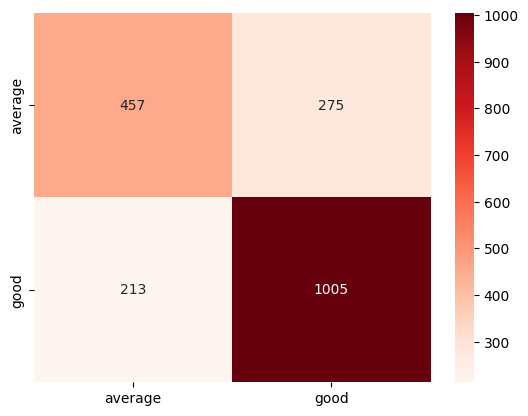

In [531]:
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

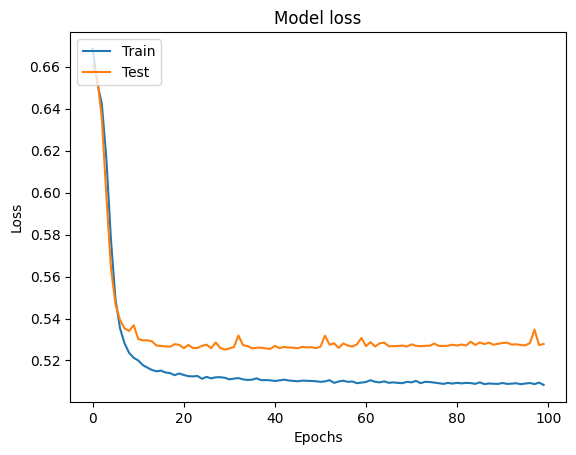

In [532]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Second try with 3, 6, 2 structure, elu and softmax activation functions, solver adam

In [533]:
model = Sequential()
model.add(Dense(3, activation='elu', input_dim=(x_train.shape[1])))
model.add(Dense(6, activation='elu'))
model.add(Dense(2, activation='softmax'))
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, verbose=0, validation_data=(x_test, y_test_to_validation))

In [534]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=-1)

print("Accuracy: ", accuracy_score(y_test, pred))

61/61 [==============================] - 0s 1ms/step
Accuracy:  0.7441025641025641


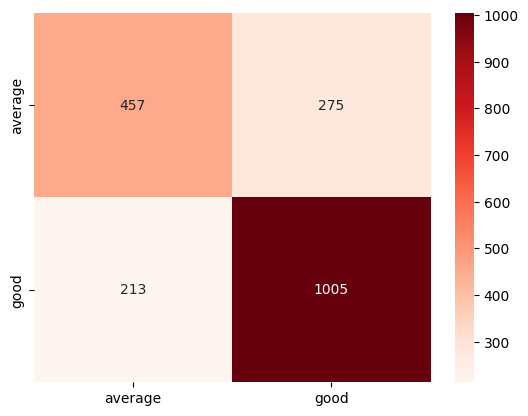

In [535]:
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

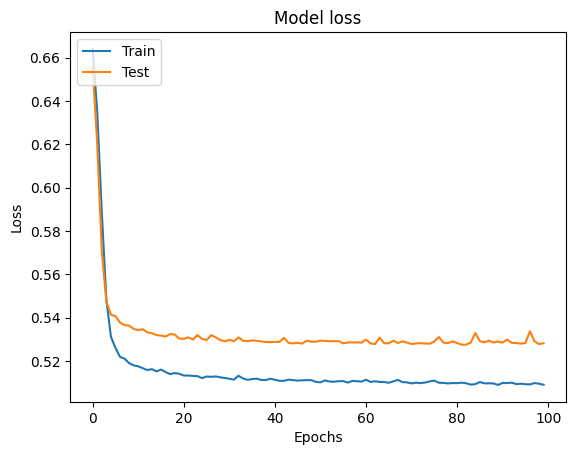

In [536]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Third try with 3, 6, 2 structure, relu and softmax activation functions, solver adam

In [537]:
model = Sequential()
model.add(Dense(3, activation='relu', input_dim=(x_train.shape[1])))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='softmax'))
    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, verbose=0, validation_data=(x_test, y_test_to_validation))

In [538]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=-1)

print("Accuracy: ", accuracy_score(y_test, pred))

61/61 [==============================] - 0s 1ms/step
Accuracy:  0.7425641025641025


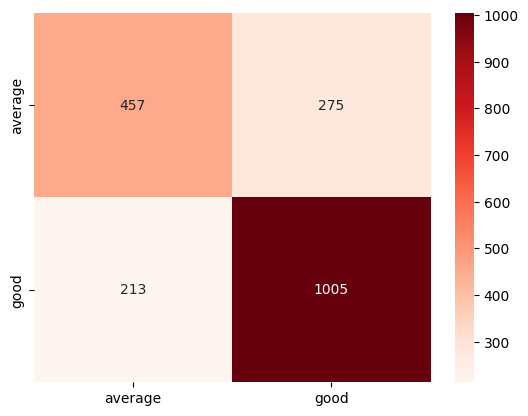

In [539]:
ax = sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt="d", cmap="Reds", xticklabels=labels, yticklabels=labels)

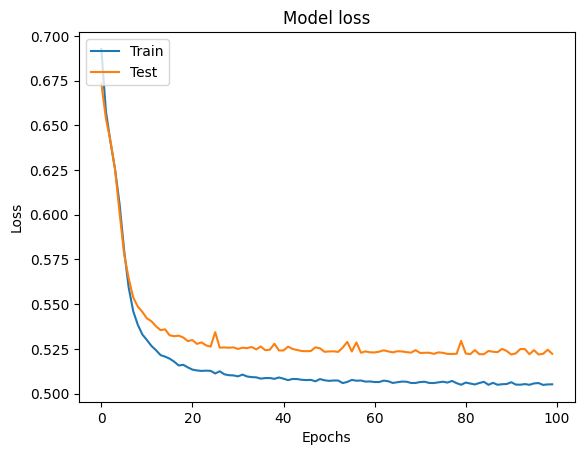

In [540]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Summary

All tested classifiers obtained similar final results on both processing of the adatset. The results were around 75%, but the highest percentage was obtained by the deep decision tree, which with the second version of the dataset was about 77%. The worst was the naive bayes classifier, which in both cases obtained < 70%

## Bibliography

https://www.kaggle.com/datasets/rajyellow46/wine-quality